Get daily weather summary from Newark Airport station.

* Documentation: https://www.ncei.noaa.gov/support/access-search-service-api-user-documentation
* Readme: https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt

In [1]:
import requests

# get the daily weather summary from Newark aiport location
response = requests.get(
    "https://www.ncei.noaa.gov/access/services/data/v1"
    + "?dataset=daily-summaries"
    + "&stations=USW00014734"
    + "&startDate=2019-01-01"
    + "&endDate=2019-12-31"
    + "&dataTypes=TMAX,TMIN,PRCP,SNOW"
    + "&format=json")

from IPython.display import JSON
import json
JSON(json.loads(response.text))

<IPython.core.display.JSON object>

In [8]:
import pandas as pd

# parse response as a pandas data frame
df = pd.read_json(response.text).dropna().set_index('DATE')

# convert precip from tenths millimeters to inches
df.PRCP = df.PRCP/254
df.SNOW = df.SNOW/254

# convert temps from tenths centigrade to fahrenheit
df.TMAX = df.TMAX/10*9/5 + 32
df.TMIN = df.TMIN/10*9/5 + 32

# add condition column
df['COND'] = df.apply(lambda row: 'Snow' if row.SNOW > 0 else 'Rain' if row.PRCP > 0 else 'Clear', axis=1)

from IPython.display import display
display(df)

,STATION,SNOW,TMAX,TMIN,PRCP,COND
DATE,,,,,,
2019-01-01,USW00014734,0.0,57.92,39.92,0.078740,Rain
2019-01-02,USW00014734,0.0,41.00,35.06,0.000000,Clear
2019-01-03,USW00014734,0.0,44.96,32.00,0.000000,Clear
2019-01-04,USW00014734,0.0,46.04,29.12,0.000000,Clear
2019-01-05,USW00014734,0.0,46.94,41.00,0.610236,Rain
...,...,...,...,...,...,...
2019-12-27,USW00014734,0.0,53.96,44.96,0.000000,Clear
2019-12-28,USW00014734,0.0,53.06,37.94,0.000000,Clear
2019-12-29,USW00014734,0.0,44.96,35.06,0.318898,Rain


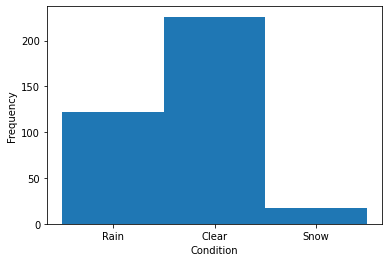

In [3]:
import matplotlib.pyplot as plt

# frequency chart of condition
plt.figure()
plt.hist(df.COND, range(4), align='left')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

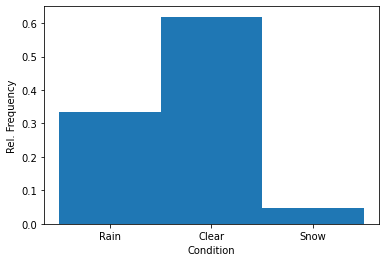

In [4]:
# relative frequency chart of condition
plt.figure()
plt.hist(df.COND, range(4), align='left', density=True)
plt.xlabel('Condition')
plt.ylabel('Rel. Frequency')
plt.show()

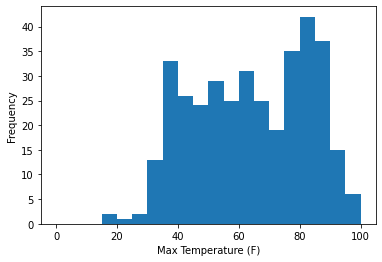

In [5]:
# histogram chart of max temperature (specified bins)
plt.figure()
plt.hist(df.TMAX, range(0,105,5))
plt.xlabel('Max Temperature (F)')
plt.ylabel('Frequency')
plt.show()

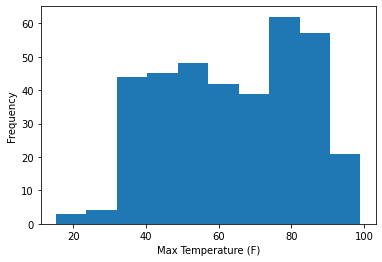

In [6]:
# histogram chart of max temperature (auto-generated bins)
plt.figure()
plt.hist(df.TMAX)
plt.xlabel('Max Temperature (F)')
plt.ylabel('Frequency')
plt.show()

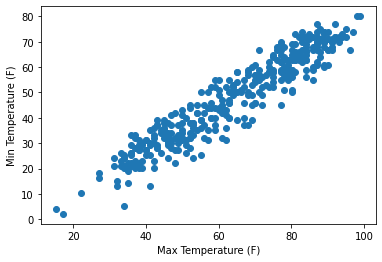

In [7]:
# scatter plot of max vs. min temperature
plt.figure()
plt.plot(df.TMAX, df.TMIN, 'o')
plt.xlabel('Max Temperature (F)')
plt.ylabel('Min Temperature (F)')
plt.show()